# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Loading data

In [2]:
# Project path
path = r'/Users/davidgriesel/Documents/0 - CareerFoundry/04 - Data Analytics Immersion/06 - Advanced Analytics & Dashboard Design/Coffee Quality - CQ 202411/02 - Data'

In [3]:
# Import datasets
df_quality = pd.read_pickle(os.path.join(path, 'Prepared Data','coffee_quality_cleaned.pkl'))

In [4]:
# Configuration
%matplotlib inline 

# Checking data

In [5]:
# Dimensions
df_quality.shape

(945, 21)

In [6]:
# Preview
df_quality.head()

,Species,Continent_of_Origin,Country_of_Origin,Harvest_Year,Expiration,Variety,Color,Processing_Method,Aroma,Flavor,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture,Quakers,Category_One_Defects,Category_Two_Defects
1,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.75,8.67,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
4,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.25,8.50,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2
6,Arabica,South America,Peru,2012-01-01,2013-09-17,Other,Bluish-Green,Washed / Wet,8.42,8.50,...,8.50,8.25,8.25,10.0,10.0,10.0,0.11,0,0,0
9,Arabica,Africa,Ethiopia,2014-01-01,2016-03-29,Other,Green,Natural / Dry,8.08,8.58,...,8.50,7.67,8.42,10.0,10.0,10.0,0.10,0,0,4
18,Arabica,Asia,China,2015-01-01,2017-04-07,Catimor,Green,Washed / Wet,8.42,8.25,...,8.17,7.92,8.00,10.0,10.0,10.0,0.10,0,0,0


# Exploring relationships

## Correlations

In [7]:
# Column names
df_quality.columns

Index(['Species', 'Continent_of_Origin', 'Country_of_Origin', 'Harvest_Year',
       'Expiration', 'Variety', 'Color', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category_One_Defects',
       'Category_Two_Defects'],
      dtype='object')

In [8]:
# Drop categorical columns
df_matrix = df_quality.drop(columns = ['Species', 'Continent_of_Origin', 'Country_of_Origin', 'Harvest_Year',
       'Expiration', 'Variety', 'Color', 'Processing_Method','Quakers', 'Category_One_Defects',
       'Category_Two_Defects'])

# Correlation matrix
df_matrix.corr()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture
Aroma,1.000000,0.687843,0.631839,0.558277,0.511892,0.563619,0.157327,0.193493,0.083830,-0.055065
Flavor,0.687843,1.000000,0.831670,0.713368,0.653870,0.700998,0.218916,0.282430,0.166396,-0.093089
Aftertaste,0.631839,0.831670,1.000000,0.654850,0.668807,0.746396,0.222753,0.274055,0.166022,-0.136153
Acidity,0.558277,0.713368,0.654850,1.000000,0.594074,0.612437,0.162791,0.163219,0.098677,-0.062145
Body,0.511892,0.653870,0.668807,0.594074,1.000000,0.680047,0.091159,0.123119,0.072401,-0.150665
Balance,0.563619,0.700998,0.746396,0.612437,0.680047,1.000000,0.220631,0.243577,0.154917,-0.174306
Uniformity,0.157327,0.218916,0.222753,0.162791,0.091159,0.220631,1.000000,0.466024,0.428017,0.019086
Clean_Cup,0.193493,0.282430,0.274055,0.163219,0.123119,0.243577,0.466024,1.000000,0.489976,-0.012319
Sweetness,0.083830,0.166396,0.166022,0.098677,0.072401,0.154917,0.428017,0.489976,1.000000,0.024354
Moisture,-0.055065,-0.093089,-0.136153,-0.062145,-0.150665,-0.174306,0.019086,-0.012319,0.024354,1.000000


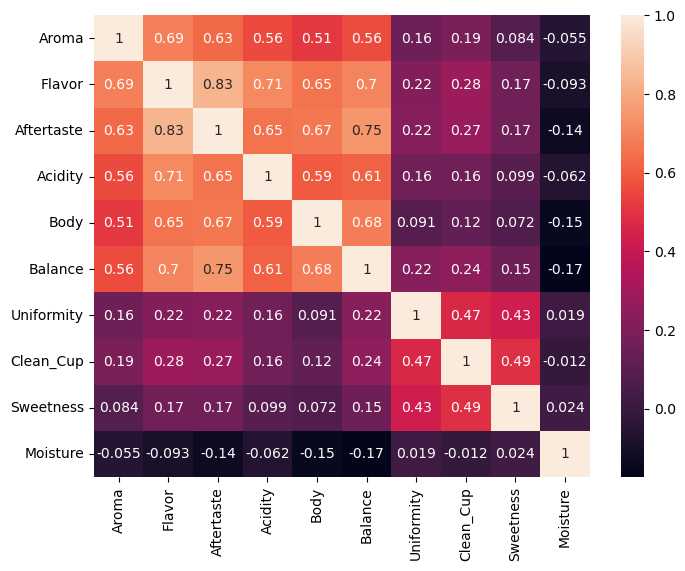

In [9]:
# Subplot
f,ax = plt.subplots(figsize = (8,6))

# Correlation heatmap
corr = sns.heatmap(df_matrix.corr(), annot = True, ax = ax)
plt.show()

In [14]:
# Calculate the correlation matrix
correlation_matrix = df_matrix.corr()

# Export the correlation matrix to a CSV file
correlation_matrix.to_csv(os.path.join(path, 'Prepared Data', 'correlation_matrix.csv'))
correlation_matrix.to_excel(os.path.join(path, 'Prepared Data', 'correlation_matrix.xlsx'))

##### Comments
- The coefficients indicate how strong the relationships between variables are.
- Values range between -1 and 1 with negative values indicating a negative relationship, and positive values a positive relationship.
- 0 : No relationship
- 0.1 - 0.3 : Weak relationship
- 0.3, - 0.5 : Moderate relationship
- 0.5 - 1.0 : Strong relationship

##### Variables: 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'
- Strong relationship with other variables from this group.

##### Variables: 'Uniformity', 'Clean_Cup', 'Sweetness'
- Moderate relationship with other variables from this group.

##### Variables: 'Moisture'
- Weak, mostly negative relationship with all other variables in the matrix.<br><br>


## Scatterplots

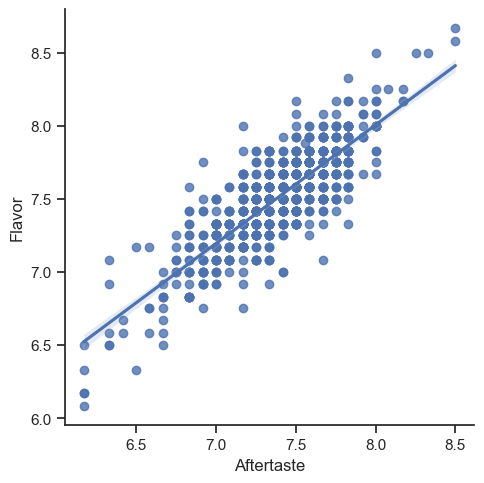

In [29]:
# Aftertaste & Flavor - 0.83
sns.lmplot(x = 'Aftertaste', y = 'Flavor', data = df_matrix)
plt.show()

##### Comments
- Strong positive correlation.
- Most points clustered near the line indicating a low degree of variance.<br><br>

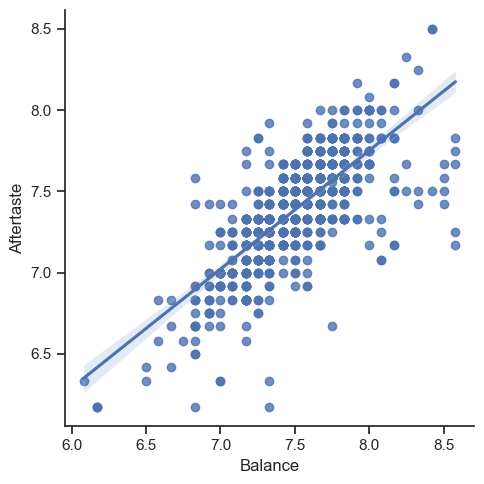

In [30]:
# Balance & Aftertaste - 0.75
sns.lmplot(x = 'Balance', y = 'Aftertaste', data = df_matrix)
plt.show()

##### Comments
- Strong positive correlation.
- Many points clustered near the line indicating a low degree of variance.
- There are some outliers, with more points falling below the line. This means that the Balance can score high while Aftertaste scores low.<br><br>

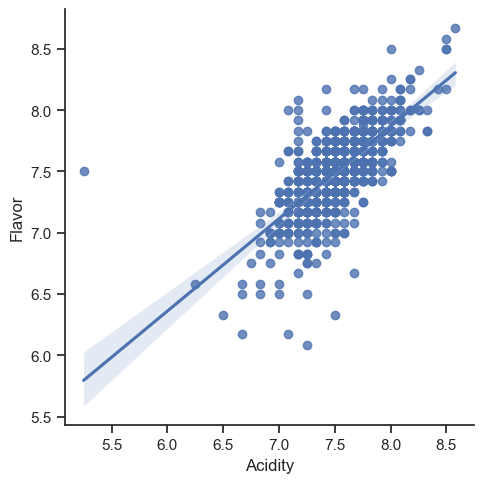

In [31]:
# Acidity & Flavor - 0.71
sns.lmplot(x = 'Acidity', y = 'Flavor', data = df_matrix)
plt.show()

##### Comments
- Strong positive correlation.
- Many points clustered near the line indicating low degree of variance.
- Similar outlier pattern with more below the line, but one lies above the line at a low Acidity score, while Flavor scores high. <br><br>

## Pair plots

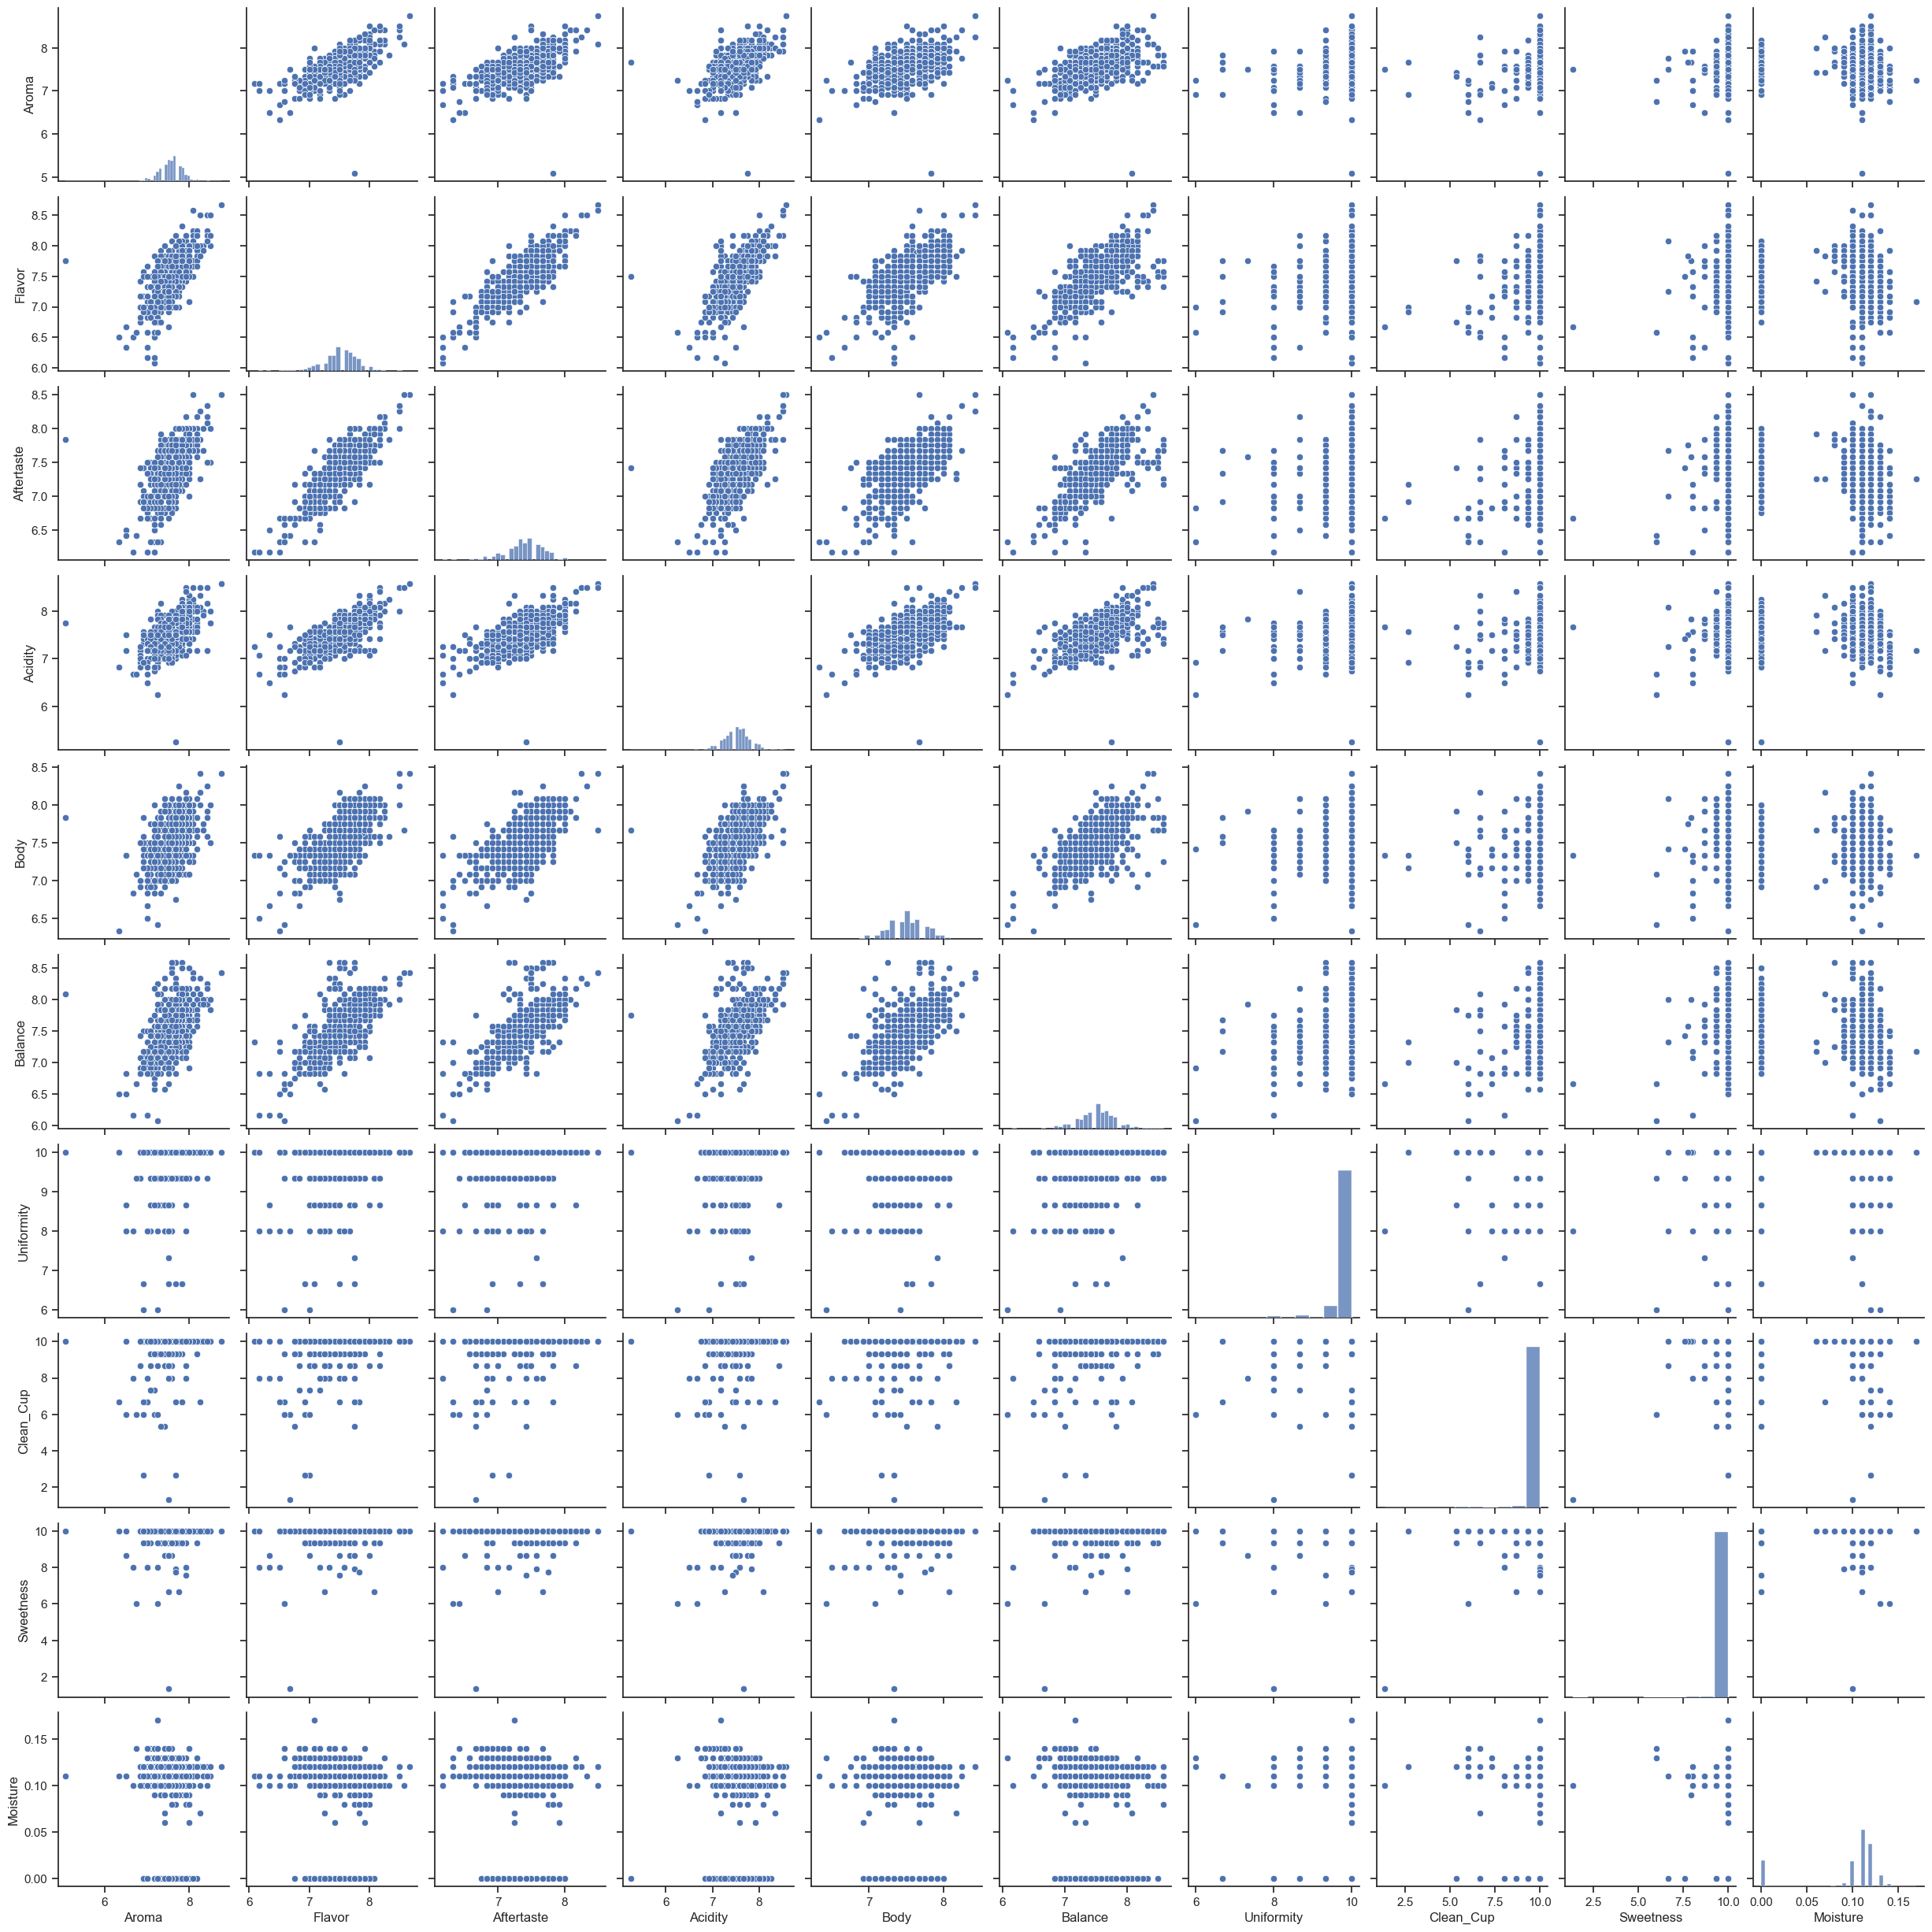

In [32]:
# Create subset with sensory evaluations
df_pair_plot = df_quality[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture']]

# Pair plot 
pair_plot = sns.pairplot(df_pair_plot)
plt.show()

##### Variables: 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'
- Linear relationships with a strong correlation.
- Normal distribution.
- Suitable for further exploration through regression analysis, for example.

##### Variables: 'Uniformity', 'Clean_Cup', 'Sweetness'
- Non-linear relationships which form clusters along specific lines.
- Heavily left-skewed, with most scores concentrated at the top of the scale.
- Possible scoring bias.
- Explore alternative ways to investigate these relationships.

##### Variables: 'Moisture'
- Non-linear relationships which cluster in lines.
- Displays more of a normal distribution but is still heavily skewed to the left with a large number of outliers near the bottom of the scale.
- Explore alternative ways to investigate its relationship with other variables, or remove from the analysis. <br><br>

## Categorical plots

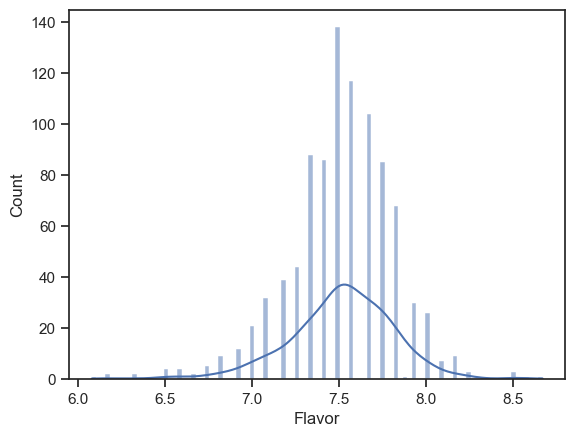

In [33]:
# Histogram
sns.histplot(df_quality['Flavor'], bins = 100, kde = True)
plt.show()

In [34]:
# Copy dataframe
df_categorical = df_quality.copy()

# Create loop
result = []
for value in df_categorical['Flavor']:
    if value < 7.25:
        result.append('below average')
    elif 7.25 <= value <= 7.75:
        result.append('average')
    else:
        result.append('high')

# Create new variable
df_categorical['Flavor_category'] = result

In [35]:
# Frequency - new variable
df_categorical['Flavor_category'].value_counts(dropna = False)

Flavor_category
average          662
high             150
below average    133
Name: count, dtype: int64

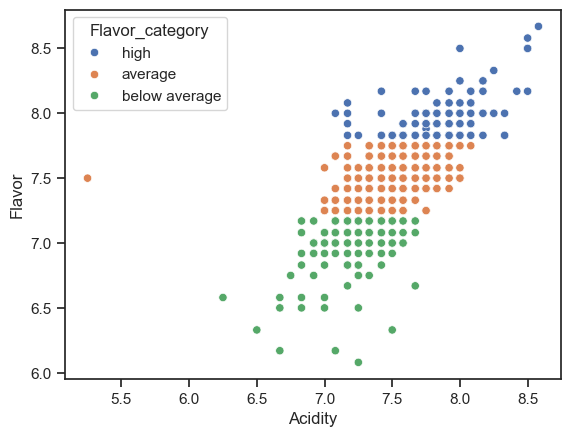

In [36]:
# Set style
sns.set(style = "ticks")

# Scatterplot
cat_scat_plot = sns.scatterplot(
    x = "Acidity", 
    y = "Flavor", 
    hue = "Flavor_category", 
    data = df_categorical
)

plt.show()

##### Previous insights
- Strong positive correlation.
- Many points clustered near the line indicating low degree of variance.
- Similar outlier pattern with more below the line, but one lies above the line at a low Acidity score, while Flavor scores high.

##### Further comments
- Flavor category supports the correlation, with higher flavor scores at the higher range of acidity scores.
- Consistency suggests predictability.
- One outlier could be due to unique characteristics, or an error.<br><br>

# Tasks

## Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

##### This workbook<br><br>

## Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
- For instance, discard “ID,” “date,” and “index” variables.

##### Questions
1. What is the distribution of species per country and continent?
- 'Species', 'Continent_of_Origin', 'Country_of_Origin'

2. Do certain species or varieties have better scores than others?
- 'Species', 'Variety', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category_One_Defects', 'Category_Two_Defects'

3. Do certain processing methods score better than others?
- 'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category_One_Defects', 'Category_Two_Defects'

4. Do certain years have better overall scores than others?
- 'Harvest_Year', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category_One_Defects', 'Category_Two_Defects'

5. Is there any correlation between quality measures?
- 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture', 'Quakers', 'Category_One_Defects', 'Category_Two_Defects'<br><br>

## Create a correlation matrix heatmap (colored).
- Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

##### Refer 4.1<br><br>

## Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
- Discuss the output in a markdown cell.

##### Refer 4.2<br><br>

## Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

##### Refer 4.3<br><br>

## Create a categorical plot and interpret the results.

##### Refer 4.4<br><br>

## Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

##### Questions:

1. What is the distribution of species per country and continent?
- Not yet analysed due to categorical nature of the variables.

2. Do certain species or varieties have better scores than others?
- Not yet analysed due to categorical nature of the variables.

3. Do certain processing methods score better than others?
- Not yet analysed due to categorical nature of the variables.

4. Do certain years have better overall scores than others?
- Not yet analysed due to categorical nature of the variables.

5. Is there any correlation between quality measures?

- Variables: 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'
    - Linear relationships with a strong correlation.
    - Normal distribution.
    - Suitable for further exploration through regression analysis, for example.<br><br>

- Variables: 'Uniformity', 'Clean_Cup', 'Sweetness'
    - Non-linear relationships which form clusters along specific lines.
    - Heavily left-skewed, with most scores concentrated at the top of the scale.
    - Possible scoring bias.
    - Explore alternative ways to investigate these relationships.<br><br>

- Variables: 'Moisture'
    - Non-linear relationships which cluster in lines.
    - Displays more of a normal distribution but is still heavily skewed to the left with a large number of outliers near the bottom of the scale.
    - Explore alternative ways to investigate its relationship with other variables, or remove from the analysis.<br><br>

## Define any hypotheses that you can at this point. You’ll be testing these later on.

##### Hypothesis
- If one of the sensory evaluation scores increases, then the others will increase as well.

##### Sensory evaluation scores
- 'Aroma'
- 'Flavor'
- 'Aftertaste'
- 'Acidity'
- 'Body'
- 'Balance'<br><br>

## Submit your Jupyter notebook with your markdown comments to your tutor for review.

- Submitted for review